In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:100% !important;}</style>'))

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt 
import numpy as np
import torch

import nmf.mult
import nmf.pgrad
import nmf.nesterov

import nmf_torch.mult
import nmf_torch.pgrad
import nmf_torch.nesterov
import nmf_torch.norms

from read_data.reading import read_reuters21578, HashTfidfVectoriser

from performance.performance_eval_func import get_random_lowrank_matrix, get_time_ratio,\
                                              compare_performance, plot_errors_dict,\
                                              torch_algo_wrapper

In [3]:
vectorizer=HashTfidfVectoriser(12000)
reuters_data = read_reuters21578("data/reuters21578", vectorizer=vectorizer)

data/reuters21578/reut2-000.sgm
data/reuters21578/reut2-001.sgm
data/reuters21578/reut2-002.sgm
data/reuters21578/reut2-003.sgm
data/reuters21578/reut2-004.sgm
data/reuters21578/reut2-005.sgm
data/reuters21578/reut2-006.sgm
data/reuters21578/reut2-007.sgm
data/reuters21578/reut2-008.sgm
data/reuters21578/reut2-009.sgm
data/reuters21578/reut2-010.sgm
data/reuters21578/reut2-011.sgm
data/reuters21578/reut2-012.sgm
data/reuters21578/reut2-013.sgm
data/reuters21578/reut2-014.sgm
data/reuters21578/reut2-015.sgm
data/reuters21578/reut2-016.sgm
data/reuters21578/reut2-017.sgm
data/reuters21578/reut2-018.sgm
data/reuters21578/reut2-019.sgm
data/reuters21578/reut2-020.sgm
data/reuters21578/reut2-021.sgm


In [4]:
algo_dict_to_test = {
    "mult": nmf.mult.factorise_Fnorm,
    "pgrad": nmf.pgrad.factorise_Fnorm_subproblems,
    "nesterov": nmf.nesterov.factorise_Fnorm,

    "mult_torch": torch_algo_wrapper(nmf_torch.mult.factorise_Fnorm, 
                                     device="cuda"),
    "pgrad_torch": torch_algo_wrapper(nmf_torch.pgrad.factorise_Fnorm_subproblems, 
                                      device="cuda"),
    "nesterov_torch": torch_algo_wrapper(nmf_torch.nesterov.factorise_Fnorm, 
                                        device="cuda")
}

In [ ]:
errors_result = errors_at_time_t_over_inner_dim(
                            reuters_data,
                            range(20, 400, 20),
                            200, algo_dict_to_test)

In [ ]:
f, ax = plt.subplots()
ax.set_title("reuters_data")
plot_dict(errors_result, ax, log=False)

In [5]:
W, H, errors = nmf.nesterov.factorise_Fnorm(reuters_data.toarray(), 120, max_steps=20,
                                           epsilon=0, record_errors=True)

<IPython.core.display.Javascript object>


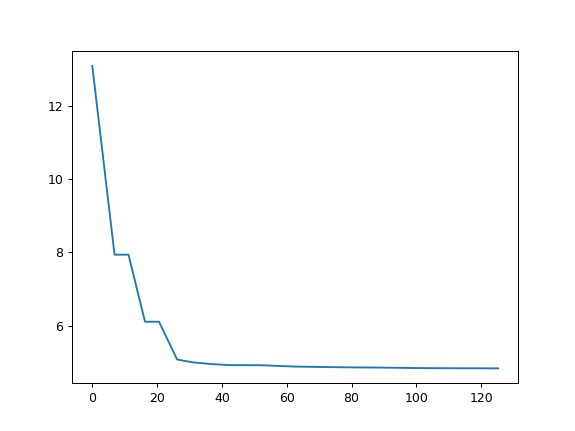

In [14]:
plt.plot(errors[:, 0], np.log(errors[:, 1]))

In [7]:
cols = np.argsort(-H, axis=1)

In [8]:
for topic_id in range(H.shape[0]):
    hashes = cols[topic_id, :3]
    words = ["({})".format("|".join(vectorizer.words_by_hash(h))) for h in hashes]
    print(topic_id, *words)

0 (sacramento|dividend|examines|arlene|favour|documents) (thrufax|faulty|split|dotronix|dalmo) (payable|kdd|files|hindus)
1 (transfering|furr|gle|the) (to|blot) (nge|dilemma|vs|sintered)
2 (transfering|furr|gle|the) (of|moulds) (and|koepfgen|bom)
3 (transfering|furr|gle|the) (nge|dilemma|vs|sintered) (of|moulds)
4 (residues|offering|potently|bancroft|luce) (imm|favorable|prototypes|marred|onemi|inc) (abs|mackes|securities|exeuctive|reallocate|connected|gingerich)
5 (nge|dilemma|vs|sintered) (cts|dishwashers|saudia|ega) (complies|shr|axelrod)
6 (transfering|furr|gle|the) (of|moulds) (to|blot)
7 (transfering|furr|gle|the) (blunt|triguna|said) (preconstruction|geologists|personal|in|brunei|arco)
8 (transfering|furr|gle|the) (of|moulds) (nge|dilemma|vs|sintered)
9 (transfering|furr|gle|the) (of|moulds) (to|blot)
10 (transfering|furr|gle|the) (nge|dilemma|vs|sintered) (of|moulds)
11 (issuers|incineration|sales) (auctioned|year|delorme) (petrovic|rapier|from)
12 (transfering|furr|gle|the) (o

In [34]:
text_id_of_interest = 50
text_vector_of_interest = W[text_id_of_interest, :]

In [35]:
idxs = np.argsort(np.linalg.norm(W[:, :] - text_vector_of_interest, axis=1))

In [40]:
print("First:\n")
print(vectorizer.last_data[idxs[0]])
print("\nClose to first:\n")
print(vectorizer.last_data[idxs[1]])
print("\nAlso close to first:\n")
print(vectorizer.last_data[idxs[2]])
print("\nAlso close to first:\n")
print(vectorizer.last_data[idxs[3]])
print("\nAlso close to first:\n")
print(vectorizer.last_data[idxs[4]])

print("\nFar from first:\n")
print(vectorizer.last_data[idxs[10000]])
print("\nFar from first:\n")
print(vectorizer.last_data[idxs[16000]])
print("\nFar from first:\n")
print(vectorizer.last_data[idxs[20000]])
print("\nAlso far from first:\n")
print(vectorizer.last_data[idxs[-1]])

First:

A group of Republican governors and
members of Congress said they intended to explore expanding the
conservation reserve program by up to 20 mln acres.
    Under current law, between 40 and 45 mln acres of erodible
land must be enrolled in the program by the end of fiscal 1990.
    The Republican Task Force on Farm and Rural America, headed
by Senate Majority Leader Robert Dole (Kan.), said they would
consider drafting legislation to increase the reserve by
between 15 and 20 mln acres.
    Sen. Charles Grassley (R-Iowa) told Reuters he would offer
a bill to expand the reserve to 67 mln acres.
 Reuter


Close to first:

The U.S. Senate Agriculture Committee
approved a measure that would exempt farmers who planted
alfalfa or other multiyear grasses and legumes between 1981 and
1985 from a federal conservation requirement.
    Sen. Edward Zorinsky, D-Neb., said his bill would restore
equity under federal sodbuster rules, which currently deny farm
program benefits to farmers who, 